#Here we gonna start with our ML project on Caifornia Housing dataset

In [5]:
pip install plotly.express

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached narwhals-1.25.2-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   -----------------------------

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
raw_df = pd.read_csv('cal_housing[1].data')

In [20]:
columns = ['Longitude','Latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']
raw_df.columns=columns

In [21]:
raw_df.head()

,Longitude,Latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         20639 non-null  float64
 1   Latitude          20639 non-null  float64
 2   housingMedianAge  20639 non-null  float64
 3   totalRooms        20639 non-null  float64
 4   totalBedrooms     20639 non-null  float64
 5   population        20639 non-null  float64
 6   households        20639 non-null  float64
 7   medianIncome      20639 non-null  float64
 8   medianHouseValue  20639 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
raw_df.describe()

,Longitude,Latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.917825,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.248495,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,295.500000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


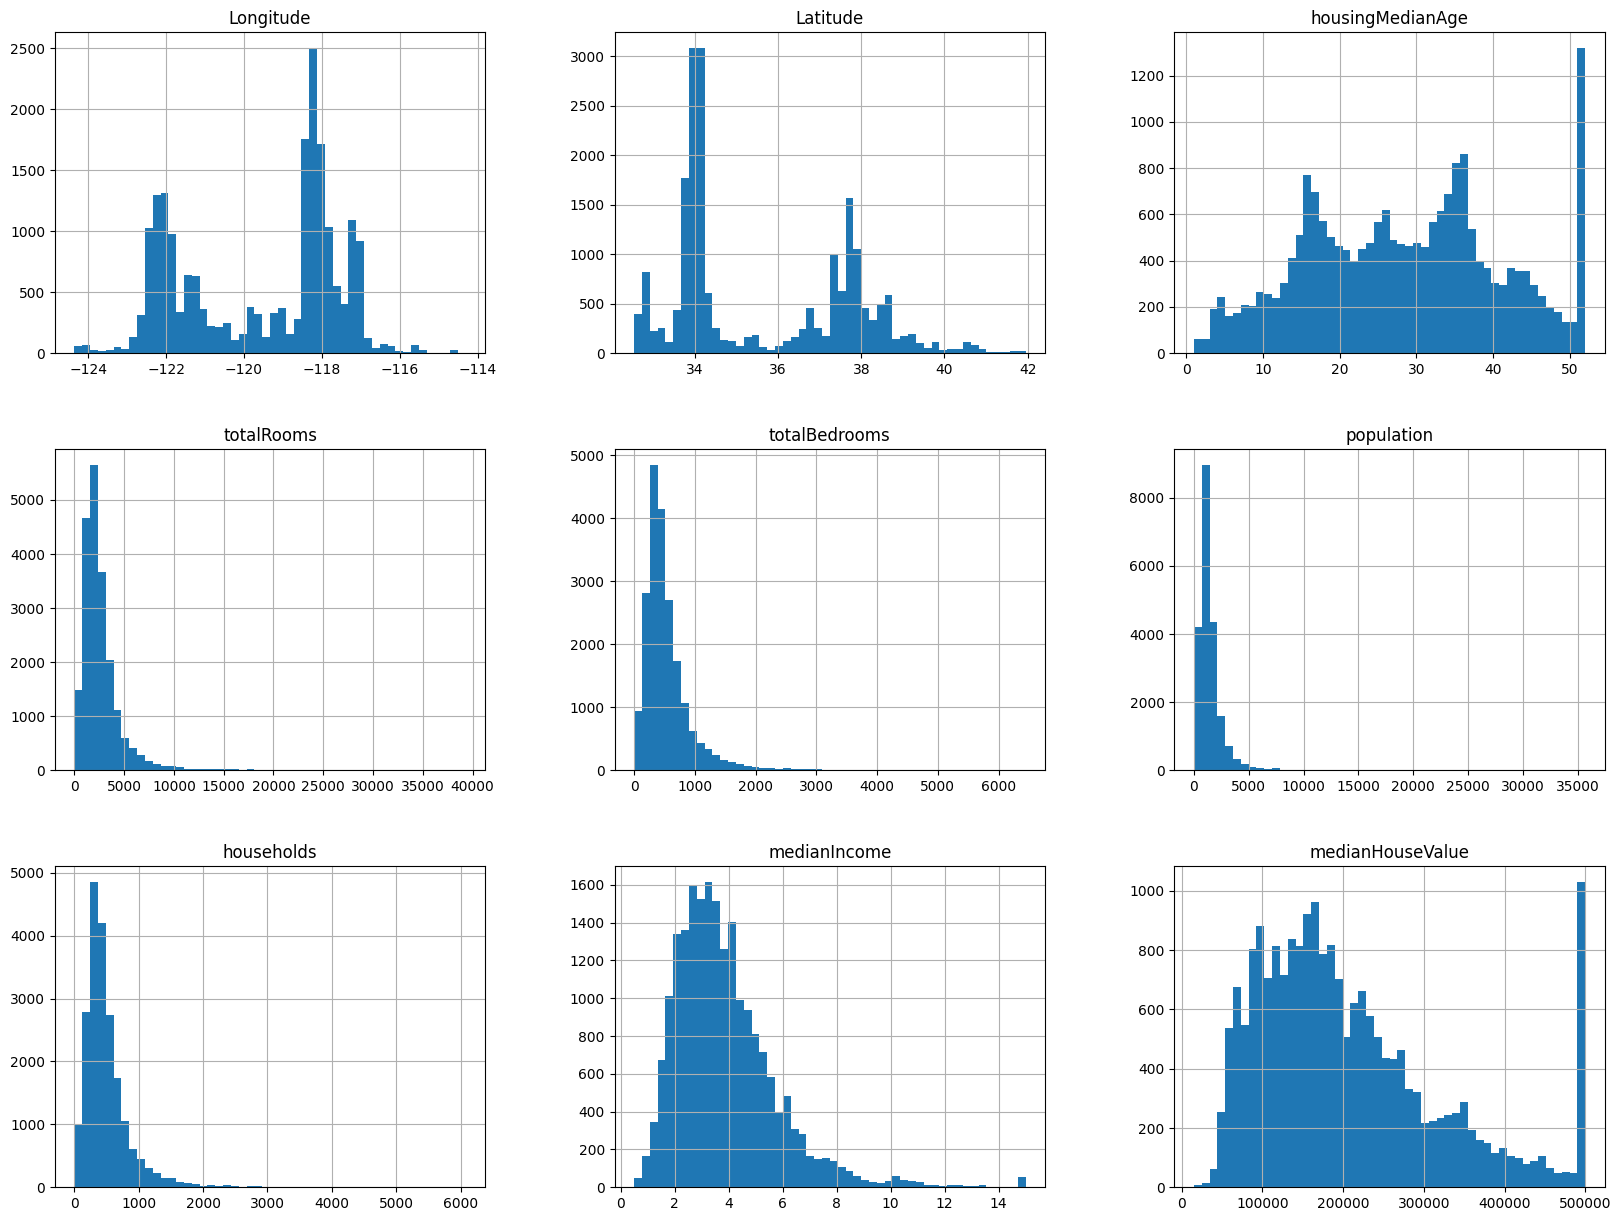

In [25]:
raw_df.hist(bins=50,figsize=(20,15))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(raw_df, test_size=0.2,random_state=42)

In [27]:
train_val_df.shape,test_df.shape

((16511, 9), (4128, 9))

In [28]:
train_df,val_df=train_test_split(train_val_df,test_size=0.2,random_state=42)

In [31]:
train_df.shape,val_df.shape,test_df.shape

((13208, 9), (3303, 9), (4128, 9))

In [43]:
input_cols=raw_df.drop(columns=['medianHouseValue']).columns.tolist()
target_col=["medianHouseValue"]

In [44]:
train_input=train_df[input_cols].copy()
val_input=val_df[input_cols].copy()
train_target=train_df[target_col].copy()
val_target=val_df[target_col].copy()

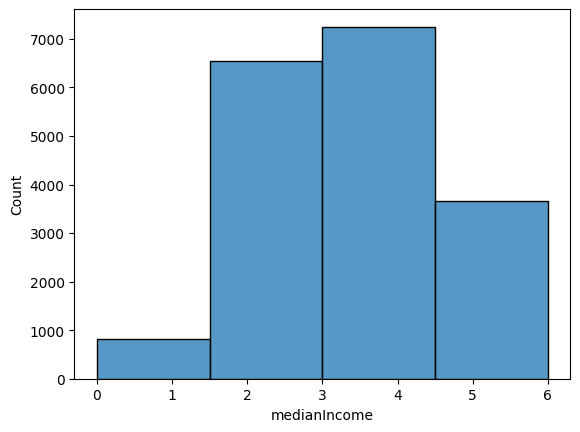

In [51]:
sns.histplot(data=raw_df,x='medianIncome',bins=[0., 1.5, 3.0, 4.5, 6.])
plt.show()